# 2.4

In [1]:
from operator import sub
import pandas as pd
import numpy as np
import PCA_utils
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from math import sqrt
NUM_OF_DP_2_VIS = 9

In [2]:
data_csv = pd.read_csv("data_proc.csv", header=None)
data = pd.DataFrame.to_numpy(data_csv)
data = np.delete(data, 0, 1)
data_raw = np.delete(data,np.s_[0:2],axis=1)

### 1. This task is about reconstructing data using PCA. First select some images from the dataset and plot them.

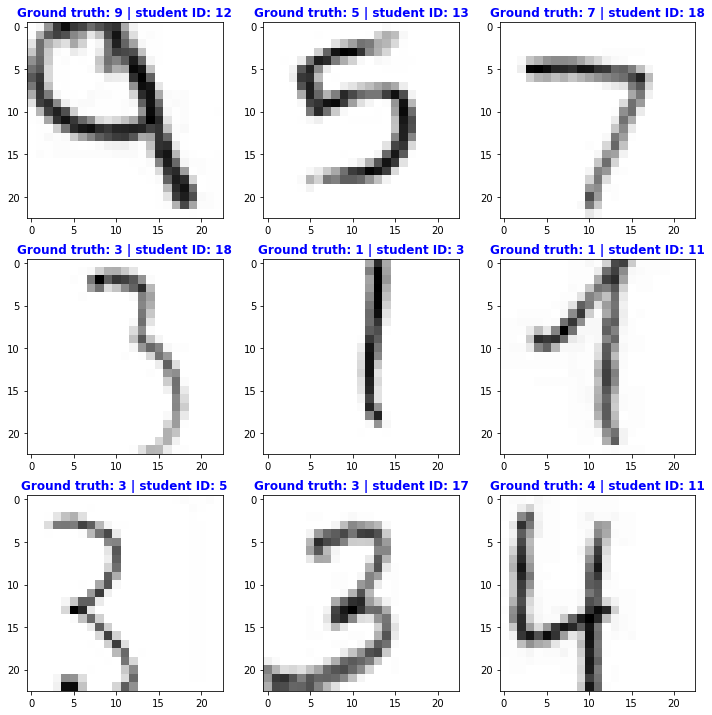

In [3]:

random_indices = np.random.choice(data.shape[0], size=NUM_OF_DP_2_VIS, replace=False)
random_images = data[random_indices, :]
# PCA_utils.visualize_images(random_images, sqrt(NUM_OF_DP_2_VIS), sqrt(NUM_OF_DP_2_VIS), "Original data")
PCA_utils.visualize_images_save(random_images, sqrt(NUM_OF_DP_2_VIS), sqrt(NUM_OF_DP_2_VIS), "", "img/dp_9_ex.png")


### 2. Plot the first 10 eigenvectors/loadingvectors as images. Can you describe what you see?

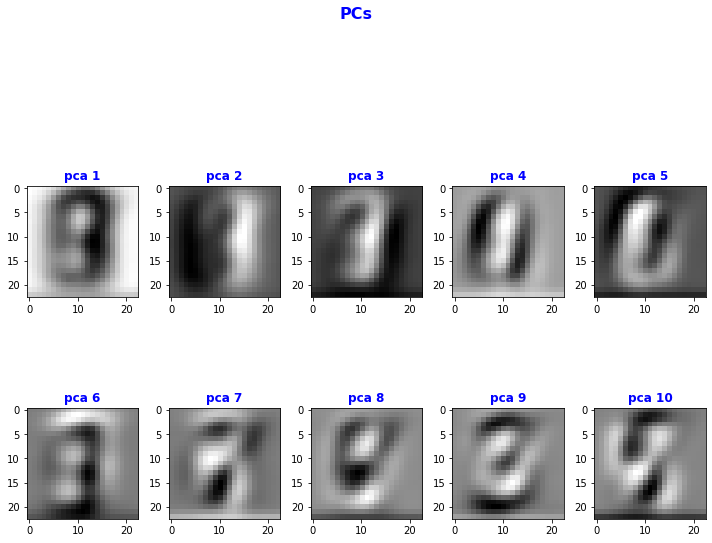

In [6]:
pca_decomp = PCA()
pca_decomp.fit(data_raw)

pcas = pca_decomp.components_[:NUM_OF_DP_2_VIS + 1, :]
sub_titles = []
for i in range(1, NUM_OF_DP_2_VIS + 2):
    sub_titles.append("pca " + str(i))

# print 9 pcas
PCA_utils.visualize_generic(pcas, 2, 5, "PCs", sub_titles, "img/pcas10.png")
# PCA_utils.visualize_generic(pcas, int(sqrt(NUM_OF_DP_2_VIS)), int(sqrt(NUM_OF_DP_2_VIS)), "", sub_titles)
# print the 10'th pca
# PCA_utils.visualize_generic(pca_decomp.components_[9], 1,1, "PCAs", "pca 10")

# description: shit's cool yo



### 3. Plot a reconstruction of the images you displayed in 2.4.1 using all PC’s. This can be done by multiplying the loadings with the scores and adding the removed centering.

[SHAPES]: data =  (66000, 529)  | PCAs =  (529, 529) loadings =  (529, 529)  | scores =  (529, 66000) recon =  (66000, 529)


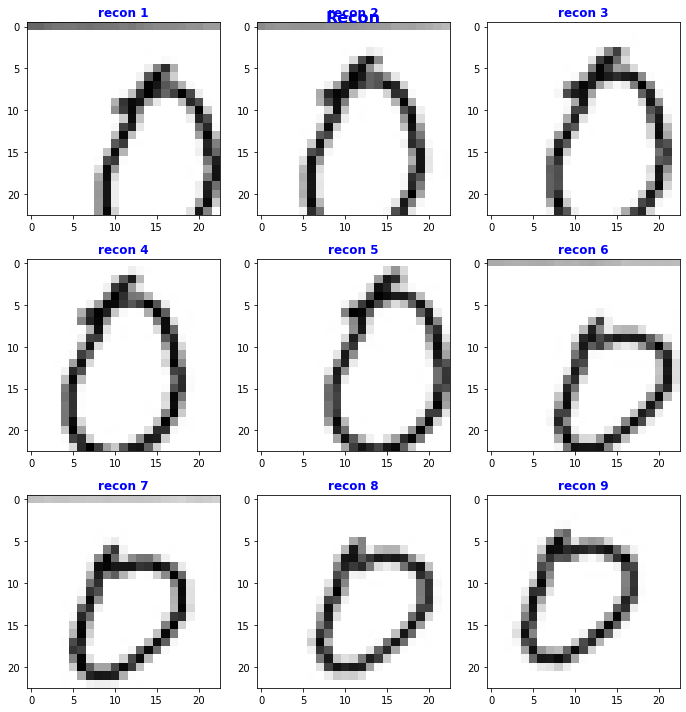

In [ ]:

# source: https://stats.stackexchange.com/questions/229092/how-to-reverse-pca-and-reconstruct-original-variables-from-several-principal-com
# loadings = the elements of eigen vectors
# scores = data * PCA

scores = np.dot(data_raw, pca_decomp.components_).T
loadings = pca_decomp.components_

recon = np.dot(loadings,scores).T

sub_titles = []
for i in range(1, NUM_OF_DP_2_VIS + 1):
    sub_titles.append("recon " + str(i))

print("[SHAPES]: data = ",data_raw.shape, " | PCAs = ", pca_decomp.components_.shape, "loadings = ",loadings.shape, " | scores = ", scores.shape,"recon = ", recon.shape)
PCA_utils.visualize_generic(recon[:NUM_OF_DP_2_VIS], sqrt(NUM_OF_DP_2_VIS), sqrt(NUM_OF_DP_2_VIS), "Recon", sub_titles)


### 4. Now re-recreate using 80 % of variance, 90 % and 95 % . Can you describe what you see? How much have you reduced the data size?

In [ ]:
pca_80 = np.empty((0, len(pca_decomp.components_[0])) ,float).T
pca_90 = np.empty((0, len(pca_decomp.components_[0])) ,float).T
pca_95 = np.empty((0, len(pca_decomp.components_[0])) ,float).T
pca_var_cum = 0
for i in range(len(pca_decomp.components_)):
    if pca_var_cum < 0.8:
        pca_80 = np.append(pca_80, pca_decomp.components_[i][:, np.newaxis],axis=1)
        pca_90 = np.append(pca_90, pca_decomp.components_[i][:, np.newaxis],axis=1)
        pca_95 = np.append(pca_95, pca_decomp.components_[i][:, np.newaxis],axis=1)
        
        pca_var_cum += pca_decomp.explained_variance_ratio_[i]
        
    elif pca_var_cum < 0.9:
        pca_90 = np.append(pca_90,pca_decomp.components_[i][:,np.newaxis],axis=1)
        pca_95 = np.append(pca_95,pca_decomp.components_[i][:,np.newaxis],axis=1)
        pca_var_cum += pca_decomp.explained_variance_ratio_[i]
    else:
        pca_95 = np.append(pca_95, pca_decomp.components_[i][:,np.newaxis],axis=1)
        pca_var_cum += pca_decomp.explained_variance_ratio_[i]    

print("[SHAPES]: pca 80% = ", pca_80.shape, "pca 90% = ", pca_90.shape, "pca 95% = ", pca_95.shape)


# just repeat the reconstruction procedure from the previous assignmen.

scores_80 = np.dot(data_raw, pca_80).T
scores_90 = np.dot(data_raw, pca_90).T
scores_95 = np.dot(data_raw, pca_95).T

loadings_80 = pca_80
loadings_90 = pca_90
loadings_95 = pca_95

recon_80 = np.dot(loadings_80, scores_80).T
recon_90 = np.dot(loadings_90, scores_90).T
recon_95 = np.dot(loadings_95, scores_95).T

sub_titles = []
for i in range(1, NUM_OF_DP_2_VIS + 1):
    sub_titles.append("recon " + str(i))



print("[SHAPES 80%]: data = ", data_raw.shape, " | PCAs = ", pca_80.shape,"loadings = ", loadings_80.shape, " | scores = ", scores_80.shape, "recon = ", recon_80.shape)
print("[SHAPES 90%]: data = ", data_raw.shape, " | PCAs = ", pca_90.shape,"loadings = ", loadings_90.shape, " | scores = ", scores_90.shape, "recon = ", recon_90.shape)
print("[SHAPES 95%]: data = ", data_raw.shape, " | PCAs = ", pca_95.shape,"loadings = ", loadings_95.shape, " | scores = ", scores_95.shape, "recon = ", recon_95.shape)

# PCA_utils.visualize_generic(recon_80[:NUM_OF_DP_2_VIS], sqrt(NUM_OF_DP_2_VIS), sqrt(NUM_OF_DP_2_VIS), "Recon 80%", sub_titles)
# PCA_utils.visualize_generic(recon_90[:NUM_OF_DP_2_VIS], sqrt(NUM_OF_DP_2_VIS), sqrt(NUM_OF_DP_2_VIS), "Recon 90%", sub_titles)
# PCA_utils.visualize_generic(recon_95[:NUM_OF_DP_2_VIS], sqrt(NUM_OF_DP_2_VIS), sqrt(NUM_OF_DP_2_VIS), "Recon 95%", sub_titles)


# how much have re reduced the data size -> ? 531 -> 59 for 80%?


[SHAPES]: pca 80% =  (529, 59) pca 90% =  (529, 106) pca 95% =  (529, 529)
[SHAPES 80%]: data =  (66000, 529)  | PCAs =  (529, 59) loadings =  (529, 59)  | scores =  (59, 66000) recon =  (66000, 529)
[SHAPES 90%]: data =  (66000, 529)  | PCAs =  (529, 106) loadings =  (529, 106)  | scores =  (106, 66000) recon =  (66000, 529)
[SHAPES 95%]: data =  (66000, 529)  | PCAs =  (529, 529) loadings =  (529, 529)  | scores =  (529, 66000) recon =  (66000, 529)


### 5. The last exercise is to compare the outcomes between two different ciphers. For instance, two different ciphers, (e.g. datapoints that represent a ’0’ and a ’1’), compare the 10 first scores and see if you can spot a difference. Try also to calculate the mean for all instances of these ciphers and compare the first 10 scores. Can you spot a pattern when comparing with the loadings.

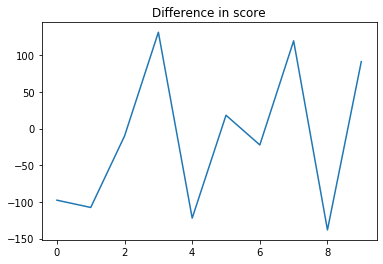

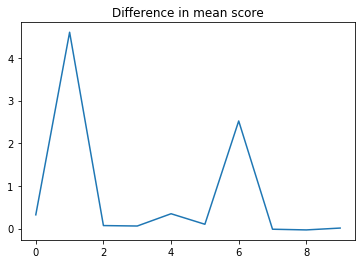

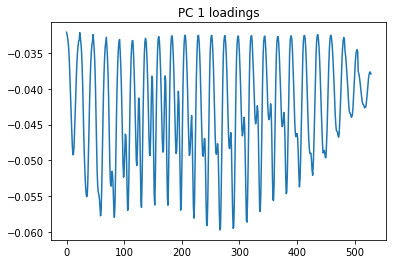

In [ ]:
# ciphers chosen 0 and 1

# source: https://stackoverflow.com/questions/38910258/python-numpy-filter-two-dimensional-array-by-condition

data_cipher_0 = np.delete( data[np.in1d(data[:, 1], np.asarray([0]))], np.s_[0:2],axis=1 ) # raw data from cipher 0
data_cipher_1 = np.delete( data[np.in1d(data[:, 1], np.asarray([1]))], np.s_[0:2],axis=1 ) # raw data from cipher 1

data_cipher_0_one = np.delete( data[np.in1d(data[:, 1], np.asarray([0]))], np.s_[0:2],axis=1 )[0] # one instance
data_cipher_1_one = np.delete( data[np.in1d(data[:, 1], np.asarray([1]))], np.s_[0:2],axis=1 )[0] # one instance

data_lim = data_cipher_0[0] if data_cipher_0.shape[0] < data_cipher_1.shape[0] else data_cipher_1.shape[0]

# ensure equal lengths
data_cipher_0 = data_cipher_0[:data_lim]
data_cipher_1 = data_cipher_1[:data_lim]

# a) compare the 10 first scores and see if you can spot a difference

# score = (data * PCA)^T
score_0_one = np.dot(data_cipher_0_one, pca_decomp.components_).T
score_1_one = np.dot(data_cipher_1_one, pca_decomp.components_).T

d_score_one = score_0_one - score_1_one

plt.title("Difference in score")
plt.plot(d_score_one[:10])
plt.show()

# b) Try also to calculate the mean (score?) for all instances of these ciphers
score_0 = np.dot(data_cipher_0, pca_decomp.components_).T
score_1 = np.dot(data_cipher_1, pca_decomp.components_).T

mean_score_0 = np.mean(score_0, axis=0)
mean_score_1 = np.mean(score_1, axis=0)

# c) and compare the first 10 scores
d_mean = (mean_score_0 - mean_score_1)

plt.title("Difference in mean score")
plt.plot(d_mean[:10])
plt.show()

plt.title("PC 1 loadings")
plt.plot(pca_decomp.components_[0])
plt.show()

# d) can you spot a pattern when comparing with the loadings
# We can here see the graphs waving in a similar pattern
